## Construct a Market Cap Index

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
ind_return=erk.get_ind_returns()
ind_size=erk.get_ind_size()
ind_nfirms=erk.get_ind_nfirms()

In [11]:
ind_return.shape

(1110, 30)

In [12]:
ind_size.shape

(1110, 30)

In [13]:
ind_nfirms.shape

(1110, 30)

In [14]:
ind_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [15]:
ind_mktcap=ind_nfirms*ind_size
ind_mktcap.shape

(1110, 30)

<AxesSubplot:>

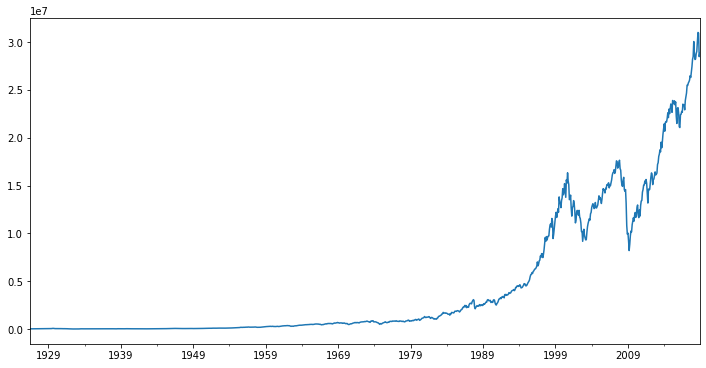

In [18]:
total_mktcap=ind_mktcap.sum(axis='columns')
##sum across columns(industries)
total_mktcap.plot(figsize=(12,6))

In [20]:
ind_capweight=ind_mktcap.divide(total_mktcap,axis='rows')
## divide row by row (year)
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [21]:
ind_capweight['1926'].sum(axis='columns')

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<AxesSubplot:>

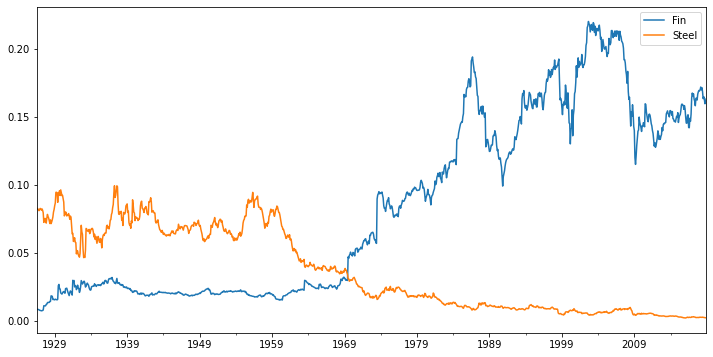

In [23]:
ind_capweight[['Fin','Steel']].plot(figsize=(12,6))

<AxesSubplot:>

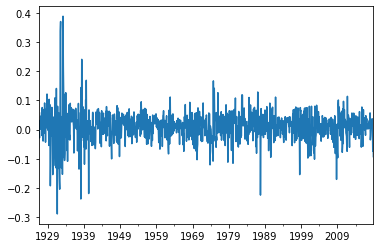

In [26]:
total_market_return=(ind_capweight*ind_return).sum(axis='columns')
total_market_return.plot()

<AxesSubplot:title={'center':'Total Market CapWeighted Index 1926-2018'}>

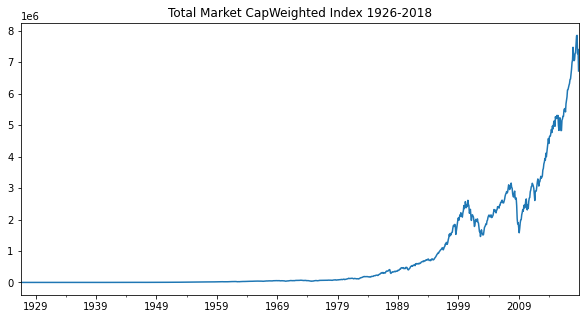

In [29]:
total_market_index=erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(10,5),title='Total Market CapWeighted Index 1926-2018')

In [31]:
## how return is related with market correlation

<AxesSubplot:>

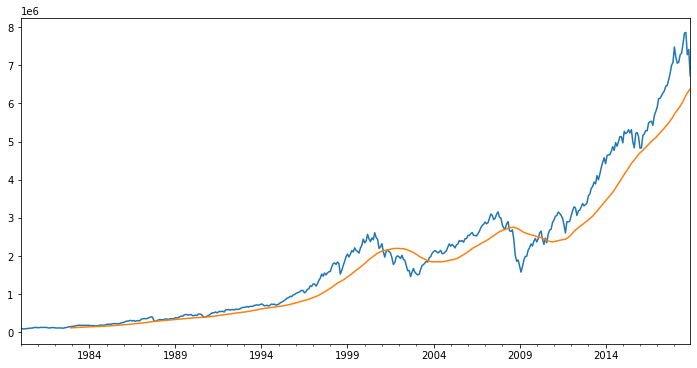

In [34]:
total_market_index['1980':].plot(figsize=(12,6))
total_market_index['1980':].rolling(window=36).mean().plot()
## produce another time series where each element is computed out of a window of 36 months
## plot index and a trailing-36-month monthly return moving average 

<AxesSubplot:>

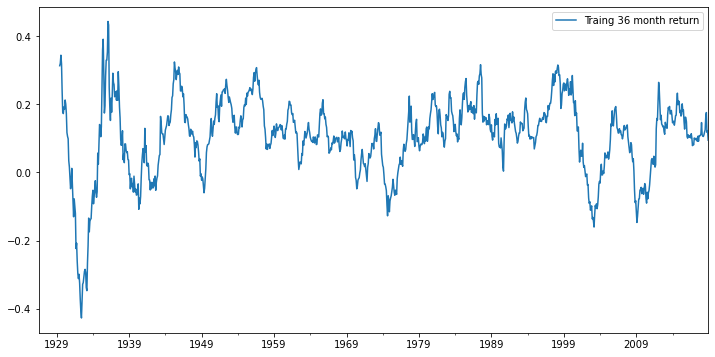

In [38]:
## now look at the return of the index
## cal erk.annualized_rets function to aggreagte each 36 month window to calculate compounded index annual return
tmi_tr36rets=total_market_return.rolling(window=36).aggregate(erk.annualized_rets, periods_per_year=12)
tmi_tr36rets.plot(figsize=(12,6),label='Traing 36 month return',legend=True)
#total_market_return.plot(label='Actual Returns',legend=True)

In [39]:
## to measure average correlation across industry, whether there is relation between corr and return observed over time

### Rolling correlation - Along with MultiIndexes and .groupby

In [41]:
ts_corr=ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [42]:
## it is a multi-level index matrix: on 2018-12. the corr between 2 industry
## but we want the average corr on that day

In [44]:
ts_corr.index.names=['Date','Industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
Date    Industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
Date    Industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
Date    Industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
Date    Industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [46]:
## now compute trailing 36 month average corr, we need to group by date

<AxesSubplot:xlabel='Date'>

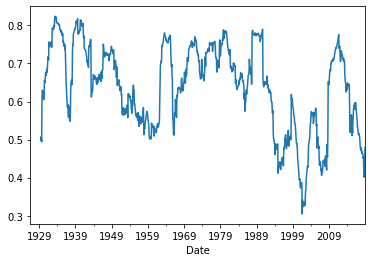

In [47]:
ind_tr36corr=ts_corr.groupby(level='Date').apply(lambda cormat:cormat.values.mean())
ind_tr36corr.plot()

<AxesSubplot:label='5a2e2a1b-e6ea-43d2-8f2b-1becc6690da3'>

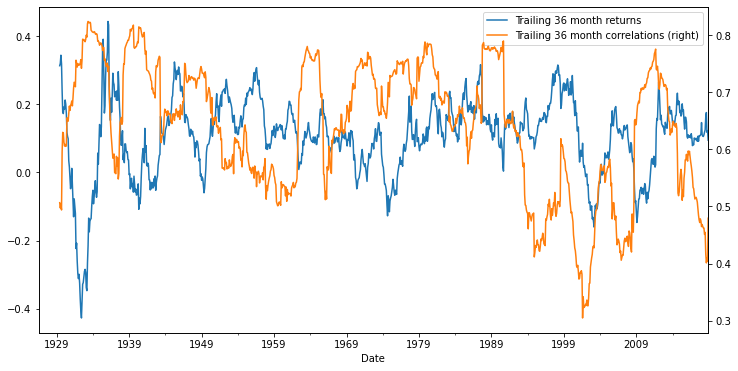

In [52]:
tmi_tr36rets.plot(label='Trailing 36 month returns',legend=True,figsize=(12,6))
ind_tr36corr.plot(label='Trailing 36 month correlations', legend=True,secondary_y=True)
## put return on the left, corr on the right axis
## orange line is the corre across industry

## We can find that when market is tanking, corr is rising, when market is rising, corr is going back to normal
## This explain why diversification fails just when you need it most (when market falls)

<AxesSubplot:label='e7f7b59d-7946-43f0-a897-ac6b543bf216'>

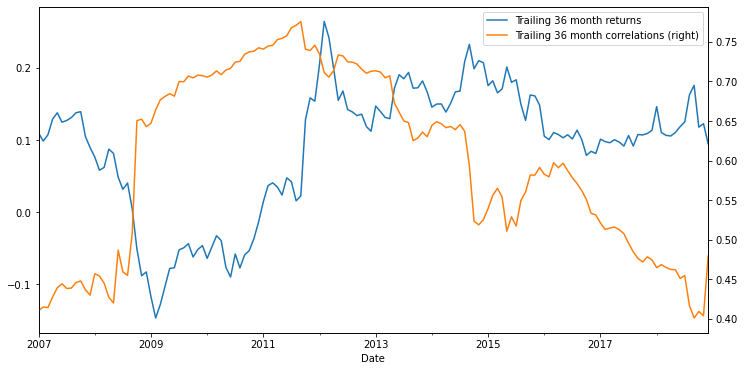

In [54]:
tmi_tr36rets['2007':].plot(label='Trailing 36 month returns',legend=True,figsize=(12,6))
ind_tr36corr['2007':].plot(label='Trailing 36 month correlations', legend=True,secondary_y=True)
## zoom into year 2007 afterwards

In [55]:
## when GFC, corr spiked up, diversification would not help you

In [56]:
tmi_tr36rets.corr(ind_tr36corr)

-0.2801006506288412

In [57]:
## negative corr between trailing average returns and average corr, that is the problem with diversification 